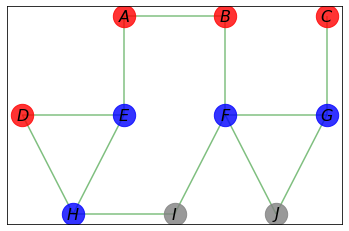

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from helpers import samples

sample = samples.graph1()
G = sample.Get_Networkx_Graph()
sample.Draw_Networkx_Graph()

# Breadth-First Search implemeantion 

The below implements BFS and draws step progress

In [2]:
from queue import Queue

def plot_graph(i, n, d_keys, discovered_nodes, nodes_in_q):
    # print('\t', n)
    # print('\t', d_keys)
    # print('\t', discovered_nodes)
    print(f'\titeration: {i}')
    pos = sample.pos
    nx.draw_networkx_nodes(G, pos, node_color='grey', node_size=500, alpha=0.8)  #can add nodelist to work with subset of nodes
    nx.draw_networkx_nodes(G, pos, nodelist=d_keys, node_color='blue', node_size=500, alpha=0.8)  
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_in_q, node_color='yellow', node_size=500, alpha=0.6)  
    nx.draw_networkx_nodes(G, pos, nodelist=discovered_nodes, node_color='yellow', node_size=500, alpha=0.9)  
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_color='green', linewidth=1.0, node_size=500, alpha=1.0)

    #add labels to nodes 
    nx.draw_networkx_labels(G, pos, labels=sample.labels, font_size=16)

    # print iteration number next to node
    offset = (-.2,-.2)
    iteration_pos = tuple(
        abs(label_pos + offset) if abs(label_pos + offset) > 1 else abs(label_pos - offset)  
        for label_pos, offset in zip(pos[n], offset))
    # print(iteration_pos)

    nx.draw_networkx_labels(G, {n:iteration_pos}, labels={n: i}, font_size=16)

    #add edges 
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5, edge_color='grey')
    # highlight edges for new nodes discovered 
    edges_nbunch = [(n,n_discovered) for n_discovered in  discovered_nodes]
    # print('\tedges_nbunch', edges_nbunch)
    nx.draw_networkx_edges(G, pos, edgelist=edges_nbunch, width=2, alpha=0.8, edge_color='green')
   
    plt.show()


def process_node(i, n): 
    print(f'processing node {n}')
    nx.set_node_attributes(G, {n:{'iteration':i}})

    # get list of neighbors t onode
    neighbors = list(G.neighbors(n))
    # print(f'\tneighbors: {[nn for nn in neighbors]}')

    # get node distace value 
    dn = d[n]
    # print(f'\tdistance: {dn}')
    discovered_nodes = [] # used for plotting purposes 
    for j, nn in enumerate(neighbors): 
        # if neighboring node not in distance list
        # add it to the list with distance = dn + 1
        # and put it in Q for processing 
        if nn not in d:
            # print(f'\t\tnew node {nn} discovered at distance {dn + 1}')
            discovered_nodes.append(nn)
            Q.put(nn)
            d[nn] = dn + 1
    # print(Q.queue)
    # print(f'\t{d.keys()}')
    # plot step progress
    nodes_in_q = list(Q.queue)
    plot_graph(i, n, list(d.keys()), discovered_nodes, nodes_in_q)

processing node A
	iteration: 0


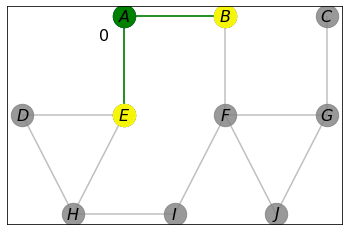

processing node B
	iteration: 1


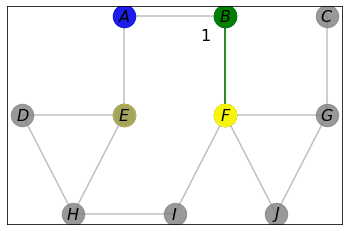

processing node E
	iteration: 2


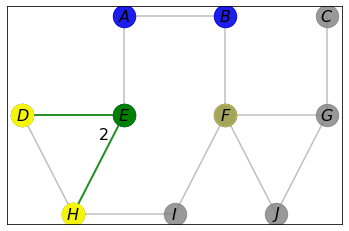

processing node F
	iteration: 3


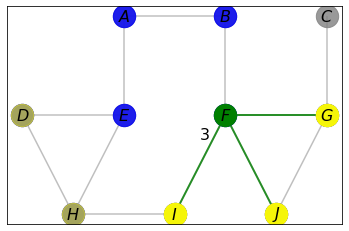

processing node D
	iteration: 4


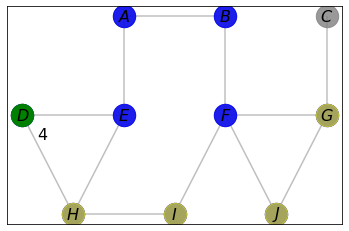

processing node H
	iteration: 5


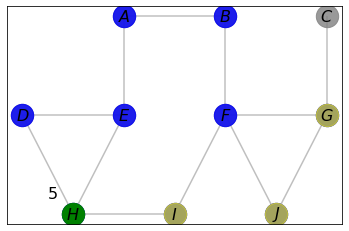

processing node G
	iteration: 6


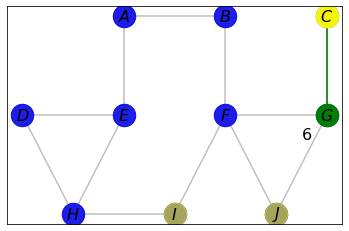

processing node J
	iteration: 7


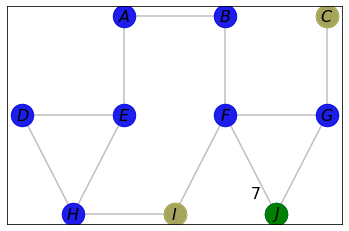

processing node I
	iteration: 8


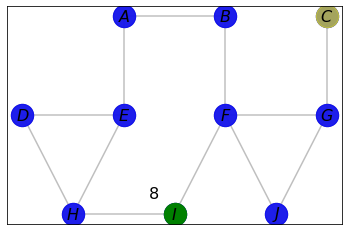

processing node C
	iteration: 9


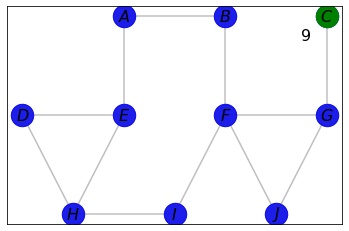

In [3]:
# initialise empty distance list and Q
d = {}
Q = Queue() 

# add first node to the Q, and set its distance to 0
Q.put('A')
d['A'] = 0

# print(Q.queue)
# print(d)

# reset iteration counter - display only not used in logic
i = 0

while not Q.empty():
    # get node from queue
    # process node
    # advance iteration counter
    n = Q.get()
    process_node(i, n)
    i += 1